# Laboratoire 4 : Développement d'un système intelligent
#### Département du génie logiciel et des technologies de l’information

| Étudiants             |                                                         |
|-----------------------|---------------------------------------------------------|
| Jean-Philippe Decoste |  DECJ19059105                                           |
| Ahmad Al-Taher        |   ALTA22109307                                          |
| Stéphanie Lacerte     |   LACS06629109                                          |
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | 2                                                       |
| Numéro du laboratoire | 04                                                      |
| Professeur            | Hervé Lombaert                                          |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 13 dev 2018                                             |

In [1]:
from algos import DecisionTree
from algos import Knn
from algos import Bayes
from algos import NeuralNetwork
from algos import SVM
from helpers import datasets as Data
from helpers import utilities as Utils
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Using TensorFlow backend.


## Paramètres

In [2]:
# Music CSV
JMIRMFCC_CSV = r"music\tagged_feature_sets\msd-jmirmfccs_dev\msd-jmirmfccs_dev.csv"
MARSYAS_CSV = r"music\tagged_feature_sets\msd-marsyas_dev_new\msd-marsyas_dev_new.csv"
RYTHMHISTOGRAM_CSV = r"music\tagged_feature_sets\msd-rh_dev_new\msd-rh_dev_new.csv"

UNTAGGED_PRIMITIVE1 = r"music\untagged_feature_sets\msd-jmirmfccs_test_nolabels\msd-jmirmfccs_test_nolabels.csv"
UNTAGGED_PRIMITIVE2 = r"music\untagged_feature_sets\msd-rh_test_nolabels\msd-rh_test_nolabels.csv"
UNTAGGED_PRIMITIVE3 = r"music\untagged_feature_sets\msd-trh_test_nolabels\msd-trh_test_nolabels.csv"

allFeatures = []
allAnswers = []

features_train = []
answers_train = []
features_test = []
answers_test = []

BASELINE_CLASSIFIER = None

# Préparation des fichiers de données

In [3]:
#1.A Prepare datasets
print("PREPARING DATASETS")
features1, answers1 = Data.prepareTrainDataset("Jmir MFCC", JMIRMFCC_CSV, True)
features1_train, answers1_train, features1_test, answers1_test = Data.splitDataSet(features1, answers1, 2, 0.8, 0)

features2, answers2 = Data.prepareTrainDataset("Marsyas", MARSYAS_CSV, True)
features2_train, answers2_train, features2_test, answers2_test = Data.splitDataSet(features2, answers2, 2, 0.8, 0)

features3, answers3 = Data.prepareTrainDataset("Rythm Histogram", RYTHMHISTOGRAM_CSV, True)
features3_train, answers3_train, features3_test, answers3_test = Data.splitDataSet(features3, answers3, 2, 0.8, 0)

PREPARING DATASETS
Reading Jmir MFCC features:
Progress |**************************************************| 100.0% Complete
Scaling data...
Reducing dimension...
Encoding labels...

-> Done

Splitting Dataset according to these params:
Property        Value
------------  -------
n_splits          2
test_size         0.8
random_state      0
-> Done


Reading Marsyas features:
Progress |**************************************************| 100.0% Complete
Scaling data...
Reducing dimension...
Encoding labels...

-> Done

Splitting Dataset according to these params:
Property        Value
------------  -------
n_splits          2
test_size         0.8
random_state      0
-> Done


Reading Rythm Histogram features:
Progress |**************************************************| 100.0% Complete
Scaling data...
Reducing dimension...
Encoding labels...

-> Done

Splitting Dataset according to these params:
Property        Value
------------  -------
n_splits          2
test_size         0.8
rando

## Évaluation du classificateur de base

Les cinq algorithmes vue pendant les laboratoires sont prêt à être testés. Simplement l'ajouter dans la liste et la transmettre à l'analyseur. 
- Arbre de décision : <i>decisionTree</i>
- Plus proche voisin : <i>knn</i>
- Bayes : <i>bayes</i>
- Réseau de neurones : <i>neuralNetwork</i>
- Machine à vecteur : <i>SVM</i>

In [7]:
#2.A Find best algo for specified dataset
algo_to_test = ['decisionTree', 'knn', 'neuralNetwork']
best_data1 = Utils.findBaselineClassifier(algo_to_test, features1_train, answers1_train)
best_data2 = Utils.findBaselineClassifier(algo_to_test, features2_train, answers2_train)
best_data3 = Utils.findBaselineClassifier(algo_to_test, features3_train, answers3_train)
#2.B Find best algo as Baseline Classifier
BASELINE_CLASSIFIER = Utils.getBestModel([best_data1, best_data2, best_data3])
print("The baseline Classifier is:")
print(BASELINE_CLASSIFIER.getDefinition())

Train following algo to find baseLine: 
['decisionTree', 'knn', 'neuralNetwork']

New Decision Tree Classifier
1.Evaluation 

  Depth    Accuracy
-------  ----------
      5       14.42
     10       15.62
     15       13.23
The best parameters are  {'max_depth': 10}  with a score of 15.62%

-> Done



New Decision Tree Classifier
1.Training 

  Depth    Accuracy
-------  ----------
     10       26.06

-> Done



New Knn Classifier
1.Evaluation 

Weights      K    Accuracy
---------  ---  ----------
distance     5       16.95
distance    10       18.31
distance    20       19.34
The best parameters are  {'n_neighbors': 20, 'algorithm': 'auto', 'weights': 'distance'}  with a score of 19.34%

-> Done



New Knn Classifier
1.Training 

Weights      K    Accuracy
---------  ---  ----------
distance    20       99.94

-> Done



New Neural Network Classifier
1.Evaluation

  Epoch    Batch Size    Accuracy
-------  ------------  ----------
    250          1000       96.01
    800         

## Main

In [6]:
#3.A Resplit dataset with a little more data
features1_train, answers1_train, features1_test, answers1_test = Data.splitDataSet(features1, answers1, 2, 0.6, 0)
#3.B Prepare algo combination
print("Init\n")
dTree = DecisionTree.decisionTree(5, 10)
knn = Knn.knn(5, 20, 'distance')
neuralNetwork = NeuralNetwork.neuralNetwork(2, 2, [25, 30, 15], 0.01, len(features1[0]), ['relu', 'softmax'], 800, 1000)
print()

print("Train\n")
# features 1
dTree.train(features1_train, answers1_train)
knn.train(features1_train, answers1_train)
neuralNetwork.train(features1_train, answers1_train)

# features 2
dTree.train(features1_train, answers1_train)
knn.train(features1_train, answers1_train)
neuralNetwork.train(features1_train, answers1_train)

# features 3
dTree.train(features1_train, answers1_train)
knn.train(features1_train, answers1_train)
neuralNetwork.train(features1_train, answers1_train)


# prediction 1
dTree_predict1 = dTree.predict(features1_test)
knn_predict1 = knn.predict(features1_test)
nn_predict1 = neuralNetwork.predict_classes(features1_test)

print(dTree_predict1)

#allFeatures,allAnswers, labelEncoder = Data.prepareTrainDataset("Music", TAGGED_PRIMITIVE)
#testF1, ids = Data.prepareTestDataset("Music", UNTAGGED_PRIMITIVE1)
#testF2, ids = Data.prepareTrainDataset("Music", UNTAGGED_PRIMITIVE2)
#testF3, ids = Data.prepareTrainDataset("Music", UNTAGGED_PRIMITIVE3)
#transform back the answers from numeric to label
""""answers = []
for index in range(0,len(ids)):
    answers.append(random.randint(1,14))
labels = labelEncoder.inverse_transform(answers)
Data.outPut(ids,labels)"""
#determine best dementions to use
#faster tests
#transformed =  decomposition.PCA(n_components=5).fit_transform(allFeatures)
#determine best classifier and best model
'''features_train,answers_train,features_test,answers_test = Data.splitDataSet(allFeatures,allAnswers, 10, 0.99, 0)
testF,testA,dummy2,dummy1 = Data.splitDataSet(features_test,answers_test, 1, 0.99, 0)
print("features_train %d; answers_train %d; features_test %d; answers_test %d"%(len(features_train),len(answers_train),len(testF),len(testA)))

model1 = KNeighborsClassifier(n_neighbors=3)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = KNeighborsClassifier(n_neighbors=7)
#we train here
model1.fit(features_train,answers_train)
model2.fit(features_train,answers_train)
model3.fit(features_train,answers_train)

#combine
predit1 = model1.predict(testF)
predit2 = model2.predict(testF)
predit3 = model3.predict(testF)

#print("P1 %d; P2 %d; P3 %d" %(predit1,predit2,predit3))
predictedAnswers = []
#
for index in range(0,len(predit1)):
    if predit1[index] == predit2[index] or predit1 [index]== predit3[index]:
        predictedAnswers.append(predit1[index])
    elif predit2[index] == predit3[index]:
        predictedAnswers.append(predit2[index])
    else:
        #base on best score
        predictedAnswers.append(predit3[index])
    '''

Splitting Dataset according to these params:
Property        Value
------------  -------
n_splits          2
test_size         0.6
random_state      0
-> Done


Init


New Decision Tree Classifier

New Knn Classifier

New Neural Network Classifier

Train

1.Training 

  Depth    Accuracy
-------  ----------
     10        23.1

-> Done


1.Training 

Weights      K    Accuracy
---------  ---  ----------
distance    20       99.94

-> Done


1.Training
  Epoch    Batch Size    Accuracy
-------  ------------  ----------
    800          1000          96

1.Training 

  Depth    Accuracy
-------  ----------
     10        23.1

-> Done


1.Training 

Weights      K    Accuracy
---------  ---  ----------
distance    20       99.94

-> Done


1.Training
  Epoch    Batch Size    Accuracy
-------  ------------  ----------
    800          1000          96

1.Training 

  Depth    Accuracy
-------  ----------
     10        23.1

-> Done


1.Training 

Weights      K    Accuracy
---------  ---

AttributeError: 'decisionTree' object has no attribute 'predict'

## Introduction et revue de la littérature (Question 1)

Plusieurs techniques sont en places depuis quelques années déjà afin de classifier les différents sons et musique. Des descripteurs cepstraux sont souvent utilisés pour le traitement de la parole par exemple. Selon la thèse produite par Slim Essid portant sur la classification automatique des signaux audiofréquences : reconnaissance des instruments de musique, la représentation cepstrale s’avère efficace pour de nombreuses tâches de classification audio telles que la discrimination parole/musique, la reconnaissance du genre ou encore la reconnaissance des instruments.

Dans le cadre du laboratoire, les Mel-Frequency Cepstral Coefficients (MFCC) sont justement sujets à classification. Mentionné dans plusieurs tel que Pachet - Cazaly en 2000, McKay et Fujinaga en 2004 ainsi que Li et Ogihara en 2005, la classification, spécifiquement hiérarchique a eu un grand succès pour les tâches de classification audio et du genre musical. La classification hiérarchique a pour but d'améliorer les taux de reconnaissance par rapport à ceux obtenus avec les systèmes dits “plats”, dans lesquels toutes les classes sont considérées sur un seul niveau, sans organisation particulière. De plus, l’application de regroupement (clustering) hiérarchique a également fait ses preuves pour la classification d’instruments non connus à l'étape d’apprentissage. La distance, tel que vu avec le k-mean dans le cours sur le regroupement, est utilisée comme critère de proximité des classes dans le processus de clustering, en faisant l'hypothèse de gaussianité des données.

En terme de statistique, il est possible d'observer différents résultats selon les articles lus. En effet, le taux de classification dépend des modèles utilisés et de leur primitive. Par exemple, obtenant un taux de précision d’environ 43% avec un réseau de neurones, l’article de Hu et Ogihara, en 2012 fait ces preuves face aux résultats de précision avec des classifications aléatoires. Hu et Ogihara obtiennent également un taux de classification en utilisant la combinaison de modèle à environ 84% ce qui est très acceptable.

Dans ce présent laboratoire, l’objectif premier est de construire un système intelligent permettant de classer automatiquement des échantillons de données en utilisant la combinaison de modèles et des algorithmes d’apprentissage. Le tout se fait avec les technologies Python. Dans les sections abordées ci-dessous, les sujets de configuration de la machine, l’approche de partitionnement, le choix des primitives et les modèles d’apprentissage choisi seront expliqués. De plus, les hyperparamètres seront présentés en plus de la solution finale et les améliorations possibles.

## Question 2
### Configuration de l'environnement

Dans le cadre de ce laboratoire, le projet final a été réalisé à l’aide du langage de programmation Python et Jupiter Notebook sous le système d’exploitation Windows. Les machines utilisées pour l'exécution se résument à un processeur Intel(R) Core(TM) i7-4770k CPU 3.40GHz ainsi que 16Go de mémoire vive.

### Partitionnement des données

Pour décider du classificateur de base, les algorithmes n'ont reçu que 20% des données afin d'augmenter leur exécution. Lors des tests préliminaires, ce chiffre était d'environ 50%, mais la variation du résultat d'entrainement était moindre et n'expliquait pas l'heure supplémentaire de temps de calcul.

### Fichier de primitives choisie

À ce qui a trait au choix de primitives (CSV), l'analyse des données, la lecture de la documentation fournit ainsi que plusieurs tests ont permi de déterminer que les fichiers qui permettront aux algorithmes de performer le mieux sont les suivants: JMIR MFCCs, MARSYAS ainsi que Rythm Histogram

Bien sûr, la dimension ainsi que la taille des données ont influencer cetter décision puisque le temps d'exécution des algorithmes n'est pas à négliger.

### Validation

La méthode de validation utilisée est StratifiedShuffleSplit. La performance des algorithmes avec cette méthode sur les ensembles de données est adéquate et évite des temps d’exécution trop long. Elle est, entre autre,  utilisé pour l'évaluation et l'entraînement du Baseline Classifier. La combinaison d’algorithme, quant à elle, est effectuée à l’aide de K-Fold cross-validation (5).

### Prétraitement

Afin de s'assurer d'une performance optimal, il a fallu normaliser les données en utilisant la méthode <i>MinMaxScaler</i>. Puisque le temps d'exécution était un facteur important pour l'équipe, il a également fallu réduire la dimension des données à la de PCA. De plus, KNN n'est efficace que si on lui envoi un nombre limité de dimension, cette approche offrait donc une meilleur compatibilité entre les algorithmes. Il y eu une modification supplémentaire pour optimiser le réseau neuronaux, transformer le tableau contenant les réponses en tableau binaire pour représenter chacune des classes. (EX:. avant: [4], apres: [0, 0, 0, 1])

## Question 3
### Description des modèles et justifications

Les modèles d’apprentissages qui ont été considérés pour faire l’évaluation du classificateur de base sont: arbre de décision, plus proche voisin (Knn) et réseau de neurones. Pour en arriver à ce résultat, les cinq algorithmes vus en classe ont été testés avec un échantillon des données afin de déterminer si un entraînement plus sérieux en valait le coup. Cette étape d’analyse supplémentaire a été ajoutée afin de s’assurer que les modèles choisis seraient les plus performants possible.

Elle a entre autres, permis de constater que bayes n’est pas efficace parce que la valeur de précision maximum obtenue était de 15% et un bayes multinomial ( multinomialNB() ) n’était pas compatible avec les données plus petites que zéro, comme contient le fichier JMIR MFCCs. L’évaluation de SVM a également révélé d’importantes informations. Par exemple, le taux de précision n’a jamais dépassé la barre du 17% et le temps d’exécution était très long. 


### Arbres de décision
Avec les arbres les valeurs d’entrées n’ont pas nécessairement de prétraitement et offrent généralement de bonnes performances sur les grands ensembles de données, comme dans notre cas, avec en plus un temps de calcul très raisonnable. Tous ces aspects permet d’obtenir un aperçu général de son efficacité sans être coûteux en terme de ressources
 
### KNN
Efficace avec des données de petites dimensions, les fichiers qui ont été choisi pour construire le modèle s'adaptent très bien avec Knn. 

### Réseau de neurones
Robustes au bruit et aux erreurs dans les données d’apprentissage. Puisque plusieurs cycles sont appliqués et que le réseaux est adapté à chaque fois, ceci réduit considérablement l'effet de bruit et les erreurs. Par ailleurs, les réseaux de neurones sont également flexibles. En d'autres mots, ils sont applicables sur plusieurs types de valeurs et peuvent prendre des entrées de grande dimension. Ces aspects sont bien entendu, avantageux dans le cadre de ce laboratoire. Après l’évaluation, la meilleure construction du réseau de neurones obtenue est la suivante:
                                     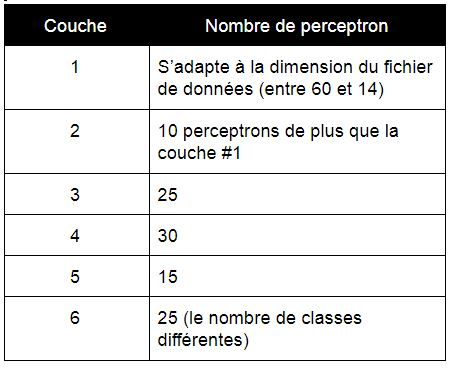


## Question 4
### Arbre de décision
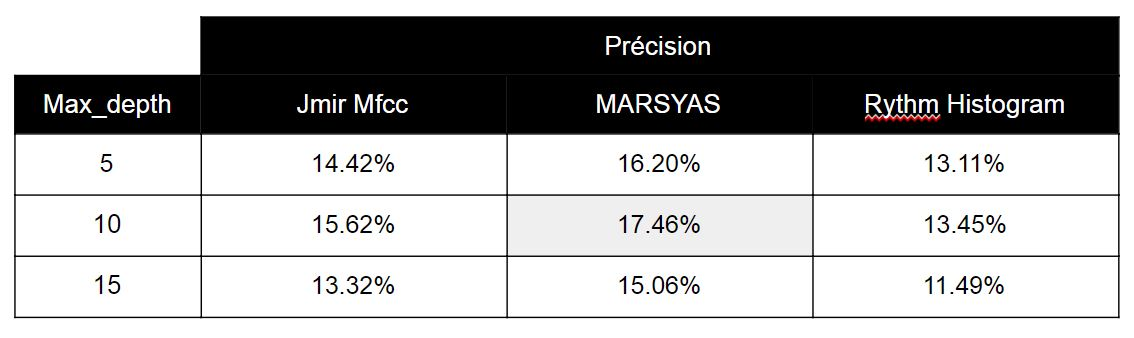
Peu importe l’ensemble de données utilisé, en regardant le tableau de précision ci-dessus, on constate que l’algorithme obtient des résultats similaire tout en suivant la même évolution. Soit une amélioration de 5 à 10 et légère perte de 10 à 15.

### KNN
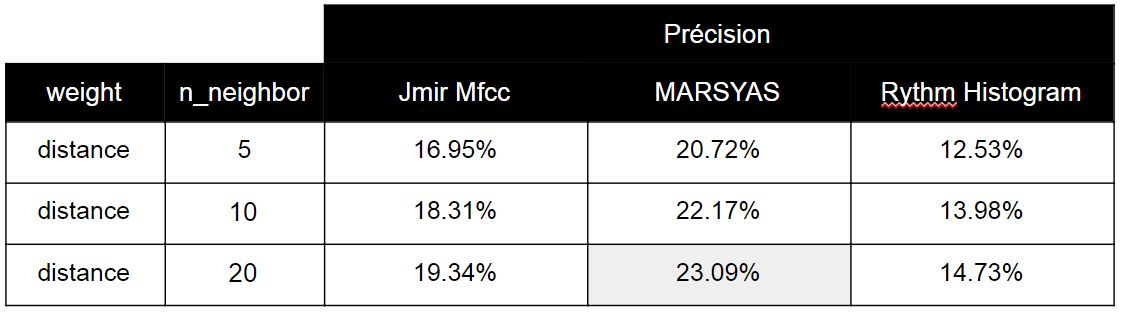
Ici on remarque une évolution constante de la précision au fur et à mesure que le nombres de voisins augmentent. Encore une fois, l’ensemble de données qui offre le meilleur résultat est encore le deuxième, soit MARSYAS. Il semble par contre y avoir une problème lors de l’entraînement du meilleur modèle, le taux de précision augmente à 98%. La différence majeure entre les deux fonctions c’est l’utilisation du gridsearch de la librairie sklearn. Ce soudain gain en précision semble être une erreur, donc un bias sera appliqué à la prédiction du Knn lors de la combinaison.

### Réseau de neurones
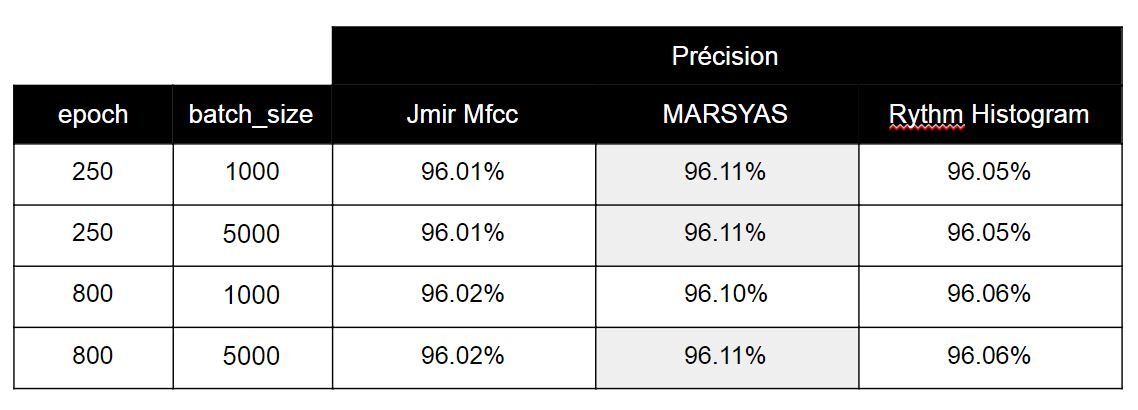
Encore une fois, le taux de précision semble très élevé, mais pour le réseau de neurones, il y eut plusieurs tests effectués et les résultats tournaient toujours autour de 90% de précision. Le modèle sélectionné est [epoch=800, batch_size=5000], son temps d’exécution est raisonnable. Une autre chose étrange par contre, lorsque le modèle fait une prédiction le taux de succès tombe à 20%. Bien sûr, l'entraînement initiale n’utilise que 20% des données, mais cette chute semble très drastique.


## Question 5
### Présentation de la conception

## Question 6
### Hyperparamètres des modèles choisis dans la conception

### Matrice des résultats

### Discussion

## Question 7 
### Formulation des recommandations

## Conclusion

## Références
[Kitahara et al., 2004] 
T. Kitahara, M. Goto, et H.G. Okuno. Category-level identification of non-registered musical instrument sounds. Dans International Conference on Acoustics, Speech, and Signal Processing (ICASSP), Montreal, Canada., mai 2004.

[Pachet et Cazaly, 2000] 
F. Pachet et D. Cazaly. A taxonomy of musical genres. Dans Content-Based Multimedia Information Access Conference (RIAO), Paris, France, avril 2000.

[McKay et Fujinaga, 2004] 
C. McKay et I. Fujinaga. Automatic genre classification using large high-level musical feature sets. Dans 5th International Conference on Music Information Retrieval (ISMIR), Barcelona, Spain, octobre 2004.

[Li et Ogihara, 2005] 
Tao Li et Mitsunori Ogihara. Music genre classification with taxonomy. Dans International Conference on Acoustics, Speech, and Signal Processing (ICASSP), Philadelphia, USA, mars 2005.
